# Enron Data Exploration

Exploring Enron dataset to identify outliers and to select features for machine learning

## Setting up notebook

In [1]:
import pandas as pd
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle

In [3]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [4]:
# Converting dictionary into Pandas data frame
df = pd.DataFrame.from_records(list(data_dict.values()))
employees = pd.Series(list(data_dict.keys()))

# set the index of df to be the employees series:
df.set_index(employees, inplace=True)

## Exploring Enron data

In [5]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


There are many missing values in the dataset. To be consistent with FeatureFormat function provided by the Udacity team, I will replace all NaN values with zero. Besides, removing persons with NaN values seems unwise considering that this is a rather small dataset (only 146 employees).

In [6]:
# Replacing NaN with zero
df.replace('NaN', 0, inplace = True)

In [7]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,0,0,0,mark.metts@enron.com,0,94299,29,38,1,...,0,1740,False,585062,0,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,0,0,6680544,11200,0,0,0,...,1586055,2660303,False,3942714,0,267102,0,0,5634343,10623258
ELLIOTT STEVEN,350000,0,-400729,0,steven.elliott@enron.com,4890344,78552,0,0,0,...,0,12961,False,1788391,0,170941,0,0,211725,6678735
CORDES WILLIAM R,0,0,0,0,bill.cordes@enron.com,651850,0,12,10,0,...,0,0,False,386335,0,0,58,764,0,1038185
HANNON KEVIN P,1500000,0,-3117011,0,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,0,243293,1035,1045,288682,6391065


In [8]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,1.333474e+06,4.387965e+05,-3.827622e+05,1.942249e+04,4.182736e+06,7.074827e+04,358.602740,38.226027,24.287671,1.149658e+06,6.646839e+05,5.854318e+05,1.749257e+06,2.051637e+04,3.658114e+05,692.986301,1221.589041,4.350622e+06,5.846018e+06
std,8.094029e+06,2.741325e+06,2.378250e+06,1.190543e+05,2.607040e+07,4.327163e+05,1441.259868,73.901124,79.278206,9.649342e+06,4.046072e+06,3.682345e+06,1.089995e+07,1.439661e+06,2.203575e+06,1072.969492,2226.770637,2.693448e+07,3.624681e+07
min,0.000000e+00,-1.025000e+05,-2.799289e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.115000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,9.394475e+04,2.288695e+05
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,6.082935e+05,2.018200e+04,16.500000,2.500000,0.000000,0.000000e+00,0.000000e+00,9.595000e+02,3.605280e+05,0.000000e+00,2.105960e+05,102.500000,289.000000,9.413595e+05,9.659550e+05
75%,8.000000e+05,9.684500e+03,0.000000e+00,0.000000e+00,1.714221e+06,5.374075e+04,51.250000,40.750000,13.750000,0.000000e+00,3.750648e+05,1.506065e+05,8.145280e+05,0.000000e+00,2.708505e+05,893.500000,1585.750000,1.968287e+06,2.319991e+06
max,9.734362e+07,3.208340e+07,0.000000e+00,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [9]:
# Getting a list of features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
bonus                        146 non-null int64
deferral_payments            146 non-null int64
deferred_income              146 non-null int64
director_fees                146 non-null int64
email_address                146 non-null object
exercised_stock_options      146 non-null int64
expenses                     146 non-null int64
from_messages                146 non-null int64
from_poi_to_this_person      146 non-null int64
from_this_person_to_poi      146 non-null int64
loan_advances                146 non-null int64
long_term_incentive          146 non-null int64
other                        146 non-null int64
poi                          146 non-null bool
restricted_stock             146 non-null int64
restricted_stock_deferred    146 non-null int64
salary                       146 non-null int64
shared_receipt_with_poi      146 non-null int64
to_messages    

### Removing outliers

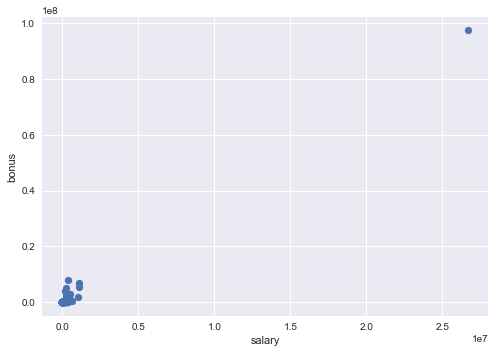

In [10]:
# Scatter plot of bonus vs salary
plt.scatter(df['salary'], df['bonus'])
plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()

In [11]:
# Fetching row with very high values of salary and bonus
df[df['salary'] > 25000000]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,0,311764000,5235198,0,0,0,...,48521928,42667589,False,130322299,-7576788,26704229,0,0,309886585,434509511


In [12]:
# Dropping the 'TOTAL' row from the dataset because it is irrelevant to the data analysis
df = df.drop('TOTAL')

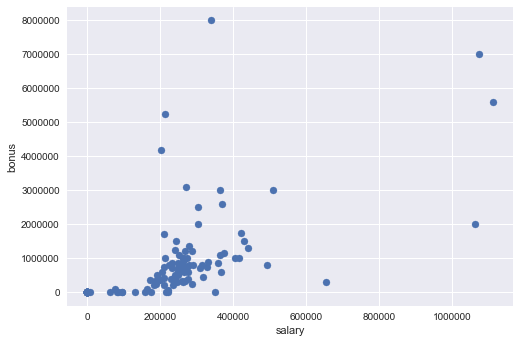

In [13]:
# Recreate scatter plot of salary vs bonus
plt.scatter(df['salary'], df['bonus'])
plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()

### How many POIs are there in the dataset?

In [14]:
poi = df[df['poi'] == 1]
len(poi)

18

### Which features are strongly correlated with POI status?

In [15]:
df.corr(method = 'pearson')

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.175580,-0.332501,-0.174556,0.417708,0.248291,0.175334,0.641847,0.449277,0.432251,0.498905,0.383030,0.360262,0.424896,-0.042943,0.650542,0.665955,0.521090,0.559937,0.462567
deferral_payments,0.175580,1.000000,-0.543713,-0.093948,0.118749,-0.018493,0.029638,0.218030,0.003004,0.014853,0.120817,0.368800,-0.038267,0.089411,-0.030262,0.244706,0.211568,0.125653,0.141904,0.119915
deferred_income,-0.332501,-0.543713,1.000000,0.075015,-0.269461,-0.043265,-0.015389,-0.196121,-0.005673,-0.025548,-0.297296,-0.265475,-0.275364,-0.127315,0.047700,-0.331188,-0.237787,-0.123114,-0.104391,-0.245786
director_fees,-0.174556,-0.093948,0.075015,1.000000,-0.115056,-0.135450,-0.079187,-0.166168,-0.097972,-0.027341,-0.156171,-0.080002,-0.120001,-0.176055,0.346192,-0.299079,-0.194331,-0.167925,-0.025429,-0.145013
exercised_stock_options,0.417708,0.118749,-0.269461,-0.115056,1.000000,0.124631,-0.022549,0.127330,0.003595,0.567960,0.400307,0.550307,0.388241,0.588012,-0.002011,0.451063,0.128269,0.087432,0.599129,0.963968
expenses,0.248291,-0.018493,-0.043265,-0.135450,0.124631,1.000000,0.156845,0.150603,0.135980,0.121881,0.100261,0.138260,0.206580,0.183258,-0.067091,0.364642,0.290408,0.245761,0.152548,0.155740
from_messages,0.175334,0.029638,-0.015389,-0.079187,-0.022549,0.156845,1.000000,0.254357,0.609788,-0.019364,0.056255,-0.054407,-0.033302,0.023625,-0.022293,0.145204,0.302114,0.508507,0.009462,-0.010440
from_poi_to_this_person,0.641847,0.218030,-0.196121,-0.166168,0.127330,0.150603,0.254357,1.000000,0.498461,0.100835,0.268699,0.160243,0.191549,0.127348,-0.046404,0.409115,0.733624,0.619246,0.216524,0.139471
from_this_person_to_poi,0.449277,0.003004,-0.005673,-0.097972,0.003595,0.135980,0.609788,0.498461,1.000000,-0.009492,0.157778,-0.049356,0.130319,0.060660,-0.022139,0.208268,0.525159,0.605648,0.062637,0.023054
loan_advances,0.432251,0.014853,-0.025548,-0.027341,0.567960,0.121881,-0.019364,0.100835,-0.009492,1.000000,0.402007,0.759298,0.220405,0.581157,-0.004837,0.387150,0.137603,0.115804,0.964163,0.629842


No features are very strongly correlated (corr > 0.5 or corr < -0.5) with POI status. Several features with decent correlation with POI status (corr > 0.3 or corr < -0.3) are:
* bonus
* exercised_stock_options
* salary
* total_stock_value


## Univariate Analysis

In [16]:
# Pivot table
pd.pivot_table(df, values = ['bonus', 'exercised_stock_options', 'salary', 'total_stock_value'],
              index = 'poi', aggfunc = 'mean')

,bonus,exercised_stock_options,salary,total_stock_value
poi,,,,
False,505067,1364960,158942,2000213
True,1844444,6975862,362142,9165670


It is clear that POI tend to receive higher bonus and salary, exercise more stock options and have higher total stock value. However, it is important to note two things:
1. The average figures might be skewed towards a handful of outliers
2. These four features are likely to be correlated with each other (e.g. employees with higher salary tend to receive higher bonus, employees with more stocks will have more stock options that they can exercise)

#### Financial feature #1: Bonus 

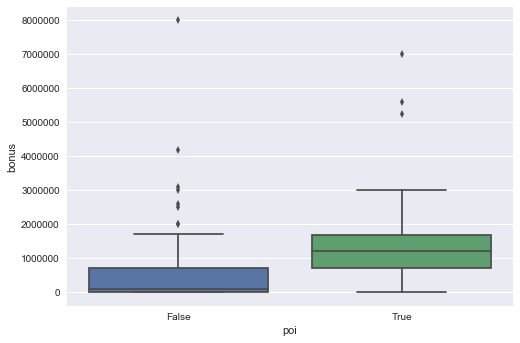

In [20]:
sns.boxplot(df.poi, df.bonus)

#### Financial feature #2: Salary

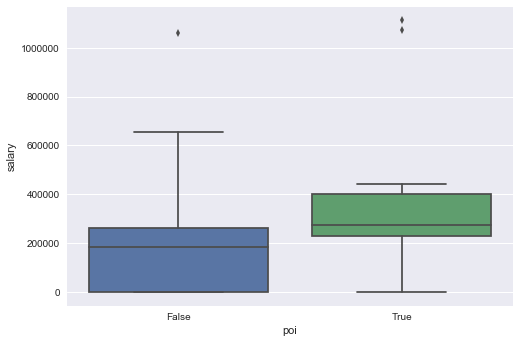

In [21]:
sns.boxplot(df.poi, df.salary)

#### Financial feature #3: Exercised stock options

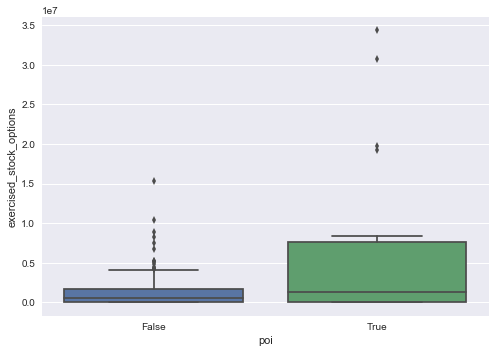

In [22]:
sns.boxplot(df.poi, df.exercised_stock_options)

#### Financial feature #4: Total stock value

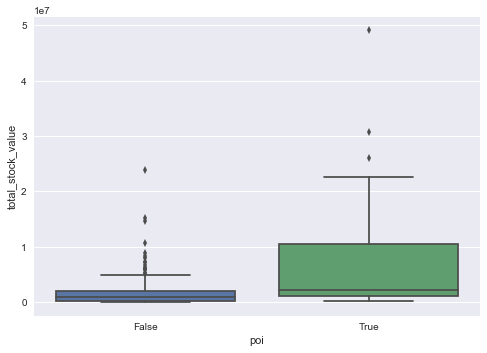

In [23]:
sns.boxplot(df.poi, df.total_stock_value)

From the boxplots above, it becomes clearer why none of the four features are very strongly correlated with POI status. POIs tend to have highly varied salary, bonus, exercised stock options and total stock options than non-POIs. The three features, other than salary, are even much more varied for POIs than non-POIs.

In [17]:
# Pivot table with non-financial features
pd.pivot_table(df, values = ['from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'to_messages'],
              index = 'poi', aggfunc = 'mean')

,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
poi,,,,,
False,379.141732,33.165354,20.566929,600.110236,1137.889764
True,233.611111,76.055556,51.888889,1386.777778,1880.000000


In [18]:
# Pivot table with remaining features
pd.pivot_table(df, values = ['deferral_payments', 'deferred_income', 'director_fees', 'expenses', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'total_payments'],
              index = 'poi', aggfunc = 'mean')

,deferral_payments,deferred_income,director_fees,expenses,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,total_payments
poi,,,,,,,,,,
False,231349.803150,-129936.559055,11316.267717,31624.566929,1.889764e+04,268217.157480,223240.157480,6.744305e+05,83245.496063,1.439839e+06
True,144415.055556,-632691.555556,0.000000,59873.833333,4.529167e+06,803241.611111,802997.388889,2.189808e+06,0.000000,7.913590e+06


### 1. Salary and bonus

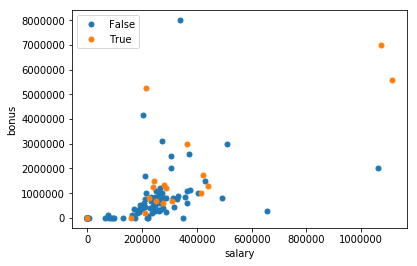

In [16]:
# Group employees based on POI status
groups = df.groupby('poi')

# Create scatter plot of salary vs bonus and color by POI status
fig, ax = plt.subplots()
ax.margins(0.05) # Adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.salary, group.bonus, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.xlabel('salary')
plt.ylabel('bonus')

plt.show()